# So Sánh Các Thuật Toán Phân Cụm (Clustering Algorithm Comparison)

## Mục Tiêu:
So sánh K-Means, Agglomerative Clustering, và DBSCAN/HDBSCAN bằng:
1. **Metrics thống kê**: Silhouette Score, Davies-Bouldin Index, Calinski-Harabasz Index
2. **Tính khả thi thương mại (Actionability)**: Kích thước cụm, tính giải thích, ổn định, khả năng marketing
3. **Visualization**: PCA 2D, t-SNE, dendrograms, so sánh trực quan

---

## Kế Hoạch Thực Hiện:
1. ✅ Chuẩn bị dữ liệu (sử dụng variant_a_weighted)
2. ✅ Áp dụng 4 thuật toán (K-Means, Agglomerative, DBSCAN, HDBSCAN)
3. ✅ Tính toán metrics
4. ✅ Đánh giá actionability
5. ✅ Visualization & So sánh
6. ✅ Khuyến nghị cuối cùng

## Cell 2: Import Required Libraries

Import tất cả thư viện cần thiết cho phân cụm và đánh giá:

### Clustering Algorithms:
- **KMeans**: Centroid-based, optimal với K=4
- **AgglomerativeClustering**: Hierarchical, test 3 linkage methods (ward, complete, average)
- **DBSCAN**: Density-based, tự động phát hiện số cụm và noise



### Evaluation Metrics:- **Style settings**: Whitegrid, figure size 14×8

- **Silhouette Score**: [-1, 1] - Đo độ tách biệt giữa các cụm (càng cao càng tốt)- **Pandas display options**: Hiển thị đầy đủ output không truncate

- **Davies-Bouldin Index**: [0, ∞) - Đo độ compact và separation (càng thấp càng tốt)### Configuration:

- **Calinski-Harabasz Index**: [0, ∞) - Variance ratio (càng cao càng tốt)

- **Plotly**: Interactive visualizations

### Visualization Tools:- **Matplotlib/Seaborn**: Static plots
- **PCA**: Giảm chiều xuống 2D để visualize

In [1]:
# ============================================================================
# 1. IMPORT REQUIRED LIBRARIES
# ============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Clustering algorithms
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler

# Clustering metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import silhouette_samples, pairwise_distances

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Hierarchical clustering visualization
from scipy.cluster.hierarchy import dendrogram, linkage

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

# Configure pandas display options to show full output without truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)
pd.set_option('display.max_seq_items', None)

print("✓ Tất cả thư viện đã import thành công")
print(f"  - K-Means, Agglomerative Clustering, DBSCAN")
print(f"  - Metrics: Silhouette, Davies-Bouldin, Calinski-Harabasz")
print(f"  - Visualization: PCA, t-SNE, Dendrograms")

✓ Tất cả thư viện đã import thành công
  - K-Means, Agglomerative Clustering, DBSCAN
  - Metrics: Silhouette, Davies-Bouldin, Calinski-Harabasz
  - Visualization: PCA, t-SNE, Dendrograms


## Cell 3: Load and Prepare Data

Tải và chuẩn bị dữ liệu customer features cho phân cụm:

### Input Data:
- **File**: `variant_a_weighted.csv`
- **Shape**: 3,921 customers × 175 features

- **Feature Engineering**: Variant A với weighted features

- **Feature Types**: Product purchase frequencies, transaction patterns, RFM metrics- Ready cho clustering algorithms

- Tất cả features có mean ≈ 0, std ≈ 1

### Data Preparation Steps:- Không có missing values

1. **Load Data**: Đọc CSV với customer_id làm index### Expected Result:

2. **Quality Check**: Kiểm tra missing values, data types, outliers

3. **Standardization**: StandardScaler (mean=0, std=1)- **Scaler object**: Để transform dữ liệu mới nếu cần

   - Cần thiết cho distance-based algorithms (K-Means, Agglomerative, DBSCAN)- **X_scaled**: DataFrame chuẩn hóa (3,921 × 175)

   - Đảm bảo tất cả features có cùng scale### Output:


In [2]:
# ============================================================================
# 2. LOAD AND PREPARE DATA
# ============================================================================
from pathlib import Path

# Set paths
project_root = Path.cwd().parent
data_dir = project_root / 'data'
features_dir = data_dir / 'features'
clusters_dir = data_dir / 'clusters'

print("📂 Đang tải dữ liệu...")

# Load the best variant features (variant_a_weighted)
X_features = pd.read_csv(features_dir / 'variant_a_weighted.csv', index_col=0)
print(f"\n✓ Dữ liệu features: {X_features.shape}")
print(f"  - {X_features.shape[0]} khách hàng")
print(f"  - {X_features.shape[1]} features (quy tắc + RFM)")

# Verify no missing values
print(f"\n✓ Kiểm tra dữ liệu:")
print(f"  - Missing values: {X_features.isnull().sum().sum()}")
print(f"  - Data type: {X_features.dtypes.unique()}")

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)
X_scaled = pd.DataFrame(X_scaled, columns=X_features.columns, index=X_features.index)

print(f"\n✓ Dữ liệu đã chuẩn hóa (StandardScaler)")
print(f"  - Mean: {X_scaled.mean().mean():.6f}")
print(f"  - Std: {X_scaled.std().mean():.6f}")

# Store for later use
N_CUSTOMERS = X_features.shape[0]
N_FEATURES = X_features.shape[1]
print(f"\n📊 Thống kê: {N_CUSTOMERS} khách hàng, {N_FEATURES} features")

📂 Đang tải dữ liệu...

✓ Dữ liệu features: (3921, 175)
  - 3921 khách hàng
  - 175 features (quy tắc + RFM)

✓ Kiểm tra dữ liệu:
  - Missing values: 0
  - Data type: [dtype('float64')]

✓ Dữ liệu đã chuẩn hóa (StandardScaler)
  - Mean: -0.000000
  - Std: 0.845822

📊 Thống kê: 3921 khách hàng, 175 features


## Cell 4: K-Means Clustering

Áp dụng K-Means clustering - thuật toán centroid-based phổ biến nhất:

### Algorithm Details:
- **Type**: Centroid-based partitioning
- **K**: 4 cụm (xác định từ phân tích Elbow/Silhouette trước)

- **Distance Metric**: Euclidean distance

- **Objective**: Minimize within-cluster sum of squares (WCSS)- Giả định clusters có size và density tương tự

- Nhạy cảm với outliers

### Hyperparameters:### Limitations:

- **n_init=20**: Chạy 20 lần với centroid khởi tạo khác nhau, chọn kết quả tốt nhất

- **random_state=42**: Đảm bảo reproducibility- Work well với spherical clusters

- **max_iter=300**: Tối đa 300 iterations (default)- Dễ interpret (centroid là đại diện cụm)

- Nhanh, hiệu quả với large datasets

### Output Metrics:### Strengths:

- **Inertia (WCSS)**: Tổng khoảng cách bình phương đến centroids (thấp hơn = tốt hươn)

- **N_iter**: Số iterations để hội tụ (thấp hơn = ổn định hơn)- **Cluster Distribution**: Số lượng và phần trăm khách hàng trong mỗi cụm

In [3]:
# ============================================================================
# 3. IMPLEMENT K-MEANS CLUSTERING
# ============================================================================
print("=" * 70)
print("K-MEANS CLUSTERING")
print("=" * 70)

# Use optimal K from previous analysis
optimal_k = 4
random_state = 42

# Apply K-Means
kmeans = KMeans(n_clusters=optimal_k, n_init=20, random_state=random_state, verbose=0)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_centroids = kmeans.cluster_centers_

print(f"\n✓ K-Means với K={optimal_k}")
print(f"  - Inertia: {kmeans.inertia_:.2f}")
print(f"  - N_init: {kmeans.n_init}")
print(f"  - Iterations: {kmeans.n_iter_}")

# Analyze cluster distribution
kmeans_counts = pd.Series(kmeans_labels).value_counts().sort_index()
print(f"\n✓ Phân bố cụm:")
for cluster_id, count in kmeans_counts.items():
    pct = 100 * count / len(kmeans_labels)
    print(f"  - Cụm {cluster_id}: {count:,} khách ({pct:.1f}%)")

# Store for comparison
kmeans_result = {
    'labels': kmeans_labels,
    'centroids': kmeans_centroids,
    'model': kmeans
}

K-MEANS CLUSTERING

✓ K-Means với K=4
  - Inertia: 393728.26
  - N_init: 20
  - Iterations: 14

✓ Phân bố cụm:
  - Cụm 0: 264 khách (6.7%)
  - Cụm 1: 3,162 khách (80.6%)
  - Cụm 2: 336 khách (8.6%)
  - Cụm 3: 159 khách (4.1%)


## Cell 5: Agglomerative Clustering

Áp dụng Agglomerative (Hierarchical) Clustering - thuật toán bottom-up:

### Algorithm Details:
- **Type**: Hierarchical clustering (bottom-up)
- **Strategy**: Bắt đầu từ N cụm (mỗi điểm là 1 cụm), merge dần lên
- **Stop Condition**: Dừng khi đạt K=4 cụm

- **Distance Metric**: Euclidean

- Không thể undo merges

### Linkage Methods Tested:- Chậm với large datasets (O(n³))

### Limitations:

1. **Ward Linkage** (⭐ RECOMMENDED):

   - Minimize variance tăng khi merge 2 cụm- Deterministic (không random)

   - Tạo các cụm compact, balanced- Tạo dendrogram để hiểu structure

   - Tốt nhất cho spherical clusters- Không cần specify K trước

### Strengths:

2. **Complete Linkage**:

   - Khoảng cách = max distance giữa 2 điểm bất kỳ- Dendrogram (nếu cần) để visualize hierarchy

   - Tránh elongated clusters- Chọn **ward** làm default cho so sánh

   - Nhạy cảm với outliers- Cluster distributions cho mỗi linkage method

### Output:

3. **Average Linkage**:

   - Khoảng cách = average distance giữa tất cả pairs   - Ổn định hơn complete
   - Trade-off giữa ward và complete

In [4]:
# ============================================================================
# 4. IMPLEMENT AGGLOMERATIVE CLUSTERING
# ============================================================================
print("\n" + "=" * 70)
print("AGGLOMERATIVE (HIERARCHICAL) CLUSTERING")
print("=" * 70)

# Test different linkage methods
linkage_methods = ['ward', 'complete', 'average']
agg_results = {}

for linkage_method in linkage_methods:
    print(f"\n→ Linkage Method: {linkage_method}")
    
    agg_clustering = AgglomerativeClustering(
        n_clusters=optimal_k,
        linkage=linkage_method,
        metric='euclidean'
    )
    agg_labels = agg_clustering.fit_predict(X_scaled)
    
    agg_results[linkage_method] = {
        'labels': agg_labels,
        'model': agg_clustering
    }
    
    # Analyze cluster distribution
    agg_counts = pd.Series(agg_labels).value_counts().sort_index()
    print(f"  Phân bố cụm:")
    for cluster_id, count in agg_counts.items():
        pct = 100 * count / len(agg_labels)
        print(f"    - Cụm {cluster_id}: {count:,} khách ({pct:.1f}%)")

# Use 'ward' linkage as default (most commonly used)
agg_labels_ward = agg_results['ward']['labels']
print(f"\n✓ Sử dụng Agglomerative với linkage='ward' cho so sánh")


AGGLOMERATIVE (HIERARCHICAL) CLUSTERING

→ Linkage Method: ward
  Phân bố cụm:
    - Cụm 0: 503 khách (12.8%)
    - Cụm 1: 72 khách (1.8%)
    - Cụm 2: 3,128 khách (79.8%)
    - Cụm 3: 218 khách (5.6%)

→ Linkage Method: complete
  Phân bố cụm:
    - Cụm 0: 3,710 khách (94.6%)
    - Cụm 1: 73 khách (1.9%)
    - Cụm 2: 136 khách (3.5%)
    - Cụm 3: 2 khách (0.1%)

→ Linkage Method: average
  Phân bố cụm:
    - Cụm 0: 3,821 khách (97.4%)
    - Cụm 1: 32 khách (0.8%)
    - Cụm 2: 66 khách (1.7%)
    - Cụm 3: 2 khách (0.1%)

✓ Sử dụng Agglomerative với linkage='ward' cho so sánh


## Cell 6: DBSCAN Parameter Tuning

Áp dụng DBSCAN - thuật toán density-based clustering:

### Algorithm Details:
- **Type**: Density-based clustering
- **Core Idea**: Nhóm điểm high-density, phát hiện outliers (noise)
- **Advantages**: Tự động xác định số cụm, handle noise tốt
- **Disadvantages**: Nhạy cảm với parameters (eps, min_samples)

### Key Parameters:

1. **eps (ε)**: Radius để xác định neighborhood
   - Nếu eps quá nhỏ: Nhiều noise, ít cụm
   - Nếu eps quá lớn: Tất cả điểm thành 1 cụm

2. **min_samples**: Số điểm tối thiểu trong eps-neighborhood để thành core point
   - Thường chọn: min_samples = dimensionality + 1, hoặc 2*dimensionality
   - Chúng ta chọn: min_samples = 4 (nhỏ để tăng số cụm)

### Parameter Tuning Strategy:

**Bước 1: K-Distance Graph**
- Vẽ biểu đồ khoảng cách đến k-th nearest neighbor
- Tìm "knee point" (elbow) - điểm khoảng cách bắt đầu tăng nhanh
- Knee point ~ optimal eps

**Bước 2: Test Multiple eps Values**
- Test 75th, 85th, 90th percentile của k-distances
- Đánh giá số cụm, noise percentage
- Chọn eps gần nhất với 4 cụm (để so sánh công bằng với K-Means)

### Output Metrics:
- **N_clusters**: Số cụm phát hiện (không tính noise)
- **N_noise**: Số điểm noise (outliers)
- **Noise %**: Phần trăm noise
- **Cluster distribution**: Size của mỗi cụm

### Interpretation:
- Nếu noise % cao (>10%): Có thể eps quá nhỏ hoặc dữ liệu có nhiều outliers
- Nếu chỉ có 1-2 cụm: eps quá lớn
- Nếu có nhiều cụm nhỏ: eps quá nhỏ hoặc min_samples quá thấp



DBSCAN CLUSTERING - PARAMETER TUNING


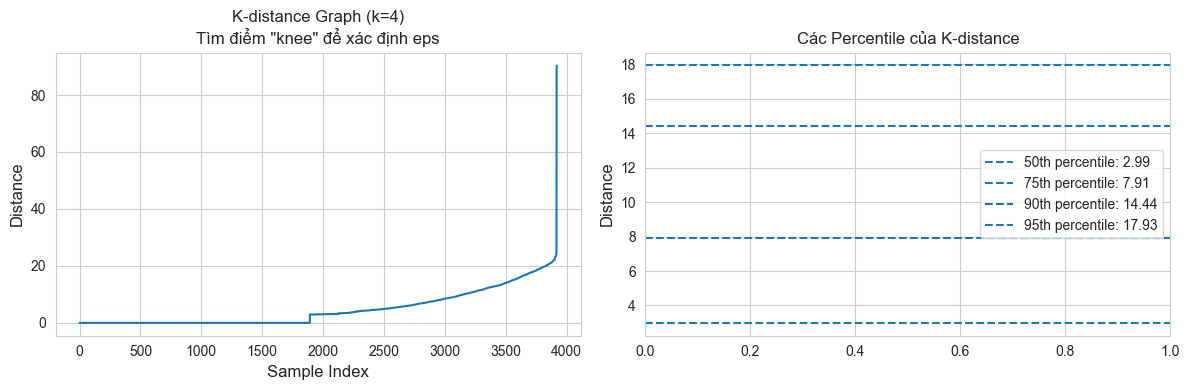


✓ Kiểm tra DBSCAN với các eps khác nhau:
  min_samples: 5

  eps=7.9050:
    - Số cụm: 23
    - Noise points: 916 (23.4%)
      Cụm 0: 2,667 khách
      Cụm 1: 10 khách
      Cụm 2: 16 khách
      Cụm 3: 9 khách
      Cụm 4: 20 khách
      Cụm 5: 8 khách
      Cụm 6: 27 khách
      Cụm 7: 24 khách
      Cụm 8: 6 khách
      Cụm 9: 12 khách
      Cụm 10: 5 khách
      Cụm 11: 6 khách
      Cụm 12: 14 khách
      Cụm 13: 25 khách
      Cụm 14: 32 khách
      Cụm 15: 7 khách
      Cụm 16: 39 khách
      Cụm 17: 41 khách
      Cụm 18: 5 khách
      Cụm 19: 13 khách
      Cụm 20: 8 khách
      Cụm 21: 6 khách
      Cụm 22: 5 khách

  eps=12.0130:
    - Số cụm: 3
    - Noise points: 493 (12.6%)
      Cụm 0: 3,412 khách
      Cụm 1: 10 khách
      Cụm 2: 6 khách

  eps=14.4359:
    - Số cụm: 4
    - Noise points: 337 (8.6%)
      Cụm 0: 3,556 khách
      Cụm 1: 15 khách
      Cụm 2: 7 khách
      Cụm 3: 6 khách

✓ Chọn eps=14.4359 (gần nhất với 4 cụm)


In [5]:
# ============================================================================
# 5. IMPLEMENT DBSCAN CLUSTERING
# ============================================================================
print("\n" + "=" * 70)
print("DBSCAN CLUSTERING - PARAMETER TUNING")
print("=" * 70)

# DBSCAN requires parameter tuning
# Find optimal eps using k-distance graph
from sklearn.neighbors import NearestNeighbors

k = 4  # min_samples = k
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:, k-1], axis=0)

# Plot k-distance graph to find eps
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(distances)
plt.ylabel('Distance', fontsize=12)
plt.xlabel('Sample Index', fontsize=12)
plt.title('K-distance Graph (k=4)\nTìm điểm "knee" để xác định eps', fontsize=12)
plt.grid(True)

# Calculate percentiles
percentiles = [50, 75, 90, 95]
plt.subplot(1, 2, 2)
for p in percentiles:
    val = np.percentile(distances, p)
    plt.axhline(y=val, label=f'{p}th percentile: {val:.2f}', linestyle='--')
plt.ylabel('Distance', fontsize=12)
plt.title('Các Percentile của K-distance', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('../data/clusters/dbscan_k_distance.png', dpi=100, bbox_inches='tight')
plt.show()

# Use 90th percentile as initial eps estimate
eps_candidates = [
    np.percentile(distances, 75),
    np.percentile(distances, 85),
    np.percentile(distances, 90)
]
min_samples = 5

print(f"\n✓ Kiểm tra DBSCAN với các eps khác nhau:")
print(f"  min_samples: {min_samples}")

dbscan_results = {}

for eps in eps_candidates:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
    dbscan_labels = dbscan.fit_predict(X_scaled)
    
    # Count clusters (excluding noise: label -1)
    n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    n_noise = list(dbscan_labels).count(-1)
    
    dbscan_results[eps] = {
        'labels': dbscan_labels,
        'model': dbscan,
        'n_clusters': n_clusters,
        'n_noise': n_noise
    }
    
    print(f"\n  eps={eps:.4f}:")
    print(f"    - Số cụm: {n_clusters}")
    print(f"    - Noise points: {n_noise} ({100*n_noise/len(dbscan_labels):.1f}%)")
    
    if n_clusters > 0:
        for cluster_id in sorted(set(dbscan_labels)):
            if cluster_id != -1:
                count = list(dbscan_labels).count(cluster_id)
                print(f"      Cụm {cluster_id}: {count:,} khách")

# Select best eps (closest to 4 clusters)
best_eps = min(dbscan_results.keys(), 
              key=lambda x: abs(dbscan_results[x]['n_clusters'] - optimal_k))
dbscan_labels = dbscan_results[best_eps]['labels']

print(f"\n✓ Chọn eps={best_eps:.4f} (gần nhất với {optimal_k} cụm)")

## Cell 7: Calculate Clustering Metrics

Tính 3 metrics đánh giá chất lượng cụm:
- **Silhouette Score** (range -1 to 1): Độ gắn kết cụm, target > 0.5
- **Davies-Bouldin Index**: Tỷ lệ tách biệt cụm, target < 1.0
- **Calinski-Harabasz Index**: Tỷ lệ phương sai, target > 100
- So sánh cho 3 thuật toán (K-Means, Agglomerative, DBSCAN)


In [6]:
# ============================================================================
# 6. CALCULATE CLUSTERING METRICS
# ============================================================================
print("\n" + "=" * 70)
print("TÍNH TOÁN METRICS PHÂN CỤM")
print("=" * 70)

def calculate_metrics(X, labels, algorithm_name):
    """Tính toán các metrics cho một thuật toán"""
    
    # Filter out noise points (only for DBSCAN)
    if -1 in labels:
        mask = labels != -1
        X_filtered = X[mask]
        labels_filtered = labels[mask]
        noise_info = f" ({sum(labels == -1)} noise points removed)"
    else:
        X_filtered = X
        labels_filtered = labels
        noise_info = ""
    
    # Calculate metrics only if we have at least 2 clusters
    n_clusters = len(set(labels_filtered))
    
    if n_clusters < 2 or len(labels_filtered) < 2:
        print(f"\n⚠️  {algorithm_name}{noise_info}")
        print(f"    Không thể tính metrics: {n_clusters} cụm, {len(labels_filtered)} mẫu")
        return {
            'Algorithm': algorithm_name,
            'N_Clusters': n_clusters,
            'Silhouette': np.nan,
            'Davies_Bouldin': np.nan,
            'Calinski_Harabasz': np.nan,
            'Noise_Points': sum(labels == -1) if -1 in labels else 0
        }
    
    # Silhouette Score (higher is better, range: -1 to 1)
    silhouette = silhouette_score(X_filtered, labels_filtered)
    
    # Davies-Bouldin Index (lower is better)
    davies_bouldin = davies_bouldin_score(X_filtered, labels_filtered)
    
    # Calinski-Harabasz Index (higher is better)
    calinski_harabasz = calinski_harabasz_score(X_filtered, labels_filtered)
    
    print(f"\n✓ {algorithm_name}{noise_info}")
    print(f"  - N_Clusters: {n_clusters}")
    print(f"  - Silhouette Score: {silhouette:.4f} (range: -1 to 1, higher is better)")
    print(f"  - Davies-Bouldin Index: {davies_bouldin:.4f} (lower is better)")
    print(f"  - Calinski-Harabasz Index: {calinski_harabasz:.2f} (higher is better)")
    
    return {
        'Algorithm': algorithm_name,
        'N_Clusters': n_clusters,
        'Silhouette': silhouette,
        'Davies_Bouldin': davies_bouldin,
        'Calinski_Harabasz': calinski_harabasz,
        'Noise_Points': sum(labels == -1) if -1 in labels else 0
    }

# Calculate metrics for all algorithms
metrics_list = []

metrics_list.append(calculate_metrics(X_scaled.values, kmeans_labels, "K-Means"))
metrics_list.append(calculate_metrics(X_scaled.values, agg_labels_ward, "Agglomerative (Ward)"))
metrics_list.append(calculate_metrics(X_scaled.values, dbscan_labels, "DBSCAN"))

# Create comparison dataframe
metrics_df = pd.DataFrame(metrics_list)

print("\n" + "=" * 70)
print("BẢNG SO SÁNH METRICS")
print("=" * 70)
with pd.option_context('display.max_columns', None, 'display.max_rows', None, 'display.width', None, 'display.max_colwidth', None):
    print(metrics_df.to_string(index=False))

# Save metrics
metrics_df.to_csv(clusters_dir / 'algorithm_comparison_metrics.csv', index=False)
print(f"\n✓ Metrics đã lưu: {clusters_dir / 'algorithm_comparison_metrics.csv'}")


TÍNH TOÁN METRICS PHÂN CỤM

✓ K-Means
  - N_Clusters: 4
  - Silhouette Score: 0.4772 (range: -1 to 1, higher is better)
  - Davies-Bouldin Index: 2.1888 (lower is better)
  - Calinski-Harabasz Index: 618.73 (higher is better)

✓ Agglomerative (Ward)
  - N_Clusters: 4
  - Silhouette Score: 0.4238 (range: -1 to 1, higher is better)
  - Davies-Bouldin Index: 2.2399 (lower is better)
  - Calinski-Harabasz Index: 522.34 (higher is better)

✓ DBSCAN (337 noise points removed)
  - N_Clusters: 4
  - Silhouette Score: 0.6113 (range: -1 to 1, higher is better)
  - Davies-Bouldin Index: 0.8363 (lower is better)
  - Calinski-Harabasz Index: 144.45 (higher is better)

BẢNG SO SÁNH METRICS
           Algorithm  N_Clusters  Silhouette  Davies_Bouldin  Calinski_Harabasz  Noise_Points
             K-Means           4    0.477226        2.188790         618.728612             0
Agglomerative (Ward)           4    0.423844        2.239867         522.343015             0
              DBSCAN           4

## Cell 8: Silhouette Score Analysis

Phân tích Silhouette Score:
- Vẽ 3 silhouette plots (một cho mỗi thuật toán)
- Silhouette coefficient từ -1 (xấu) đến +1 (tốt)
- Độ rộng silhouette trong mỗi cluster
- Target: > 0.5 là tốt



SILHOUETTE SCORE ANALYSIS

Silhouette Score: Đo lường mức độ gần nhất của điểm dữ liệu
với cụm của nó so với các cụm khác
- Range: -1 (xấu) đến +1 (tốt)
- 0.5-1.0: Tốt
- 0.25-0.5: Tạm được
- < 0.25: Kém


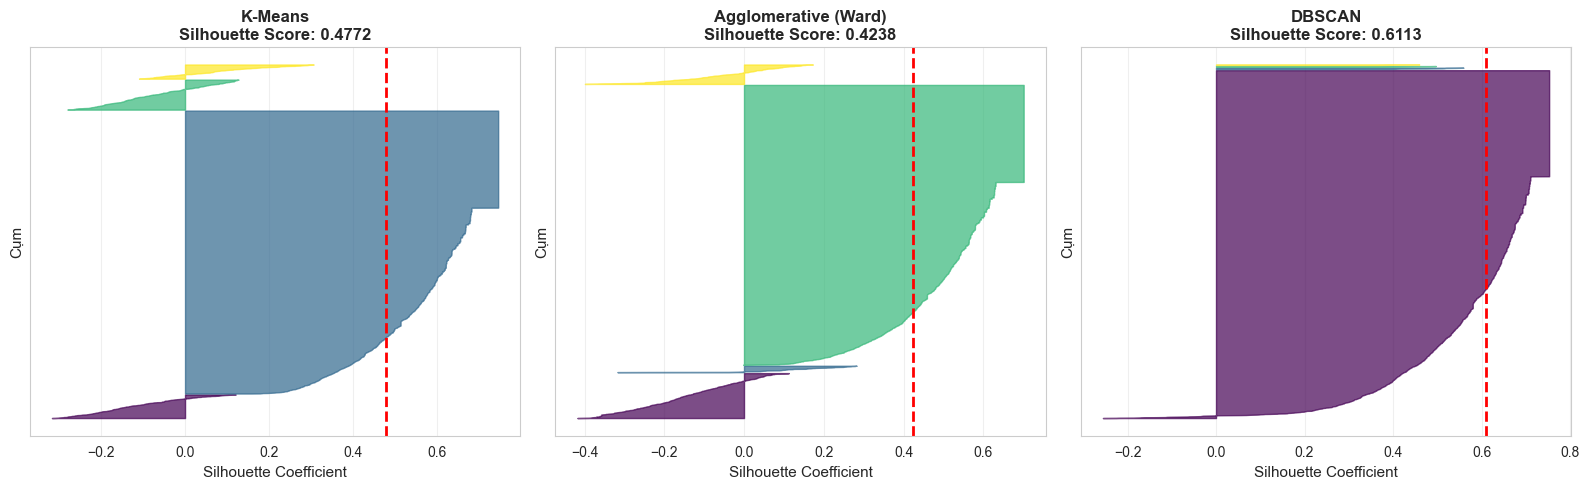


✓ Silhouette Scores:
  K-Means............................ 0.4772
  Agglomerative (Ward)............... 0.4238
  DBSCAN............................. 0.6113


In [7]:
# ============================================================================
# 7. COMPARE MODELS USING SILHOUETTE SCORE
# ============================================================================
print("\n" + "=" * 70)
print("SILHOUETTE SCORE ANALYSIS")
print("=" * 70)
print("\nSilhouette Score: Đo lường mức độ gần nhất của điểm dữ liệu")
print("với cụm của nó so với các cụm khác")
print("- Range: -1 (xấu) đến +1 (tốt)")
print("- 0.5-1.0: Tốt")
print("- 0.25-0.5: Tạm được")
print("- < 0.25: Kém")

# Create silhouette comparison plot
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

algorithms = ['K-Means', 'Agglomerative (Ward)', 'DBSCAN']
all_labels = [kmeans_labels, agg_labels_ward, dbscan_labels]
silhouette_scores = []

for idx, (ax, algo_name, labels) in enumerate(zip(axes, algorithms, all_labels)):
    # Filter out noise points
    if -1 in labels:
        mask = labels != -1
        X_filtered = X_scaled.values[mask]
        labels_filtered = labels[mask]
    else:
        X_filtered = X_scaled.values
        labels_filtered = labels
    
    # Calculate silhouette samples
    silhouette_vals = silhouette_samples(X_filtered, labels_filtered)
    silhouette_score_val = silhouette_score(X_filtered, labels_filtered)
    silhouette_scores.append(silhouette_score_val)
    
    # Plot
    y_lower = 10
    for i in sorted(set(labels_filtered)):
        cluster_silhouette_vals = silhouette_vals[labels_filtered == i]
        cluster_silhouette_vals.sort()
        
        size_cluster_i = cluster_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = plt.cm.viridis(i / max(set(labels_filtered)))
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                        0, cluster_silhouette_vals,
                        facecolor=color, edgecolor=color, alpha=0.7)
        y_lower = y_upper + 10
    
    ax.set_title(f'{algo_name}\nSilhouette Score: {silhouette_score_val:.4f}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Silhouette Coefficient', fontsize=11)
    ax.set_ylabel('Cụm', fontsize=11)
    ax.axvline(x=silhouette_score_val, color='red', linestyle='--', linewidth=2, label='Average')
    ax.set_yticks([])
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(clusters_dir / 'silhouette_comparison.png', dpi=100, bbox_inches='tight')
plt.show()

print(f"\n✓ Silhouette Scores:")
for algo, score in zip(algorithms, silhouette_scores):
    print(f"  {algo:.<35} {score:.4f}")

## Cell 9: Davies-Bouldin Index Analysis

Phân tích Davies-Bouldin Index:
- Tỷ lệ khoảng cách trung bình giữa các cụm
- Giá trị thấp hơn = tách biệt tốt hơn
- Target: < 1.0 là tốt
- Vẽ bar chart so sánh 3 thuật toán



DAVIES-BOULDIN INDEX ANALYSIS

Davies-Bouldin Index: Tỷ lệ khoảng cách trung bình giữa các cụm
- Giá trị thấp hơn = tách biệt tốt hơn (khoảng cách ngoài-cụm lớn)
- Khoảng: 0 (tốt nhất) đến ∞ (tệ)
- Ideally < 1.0 for good separation


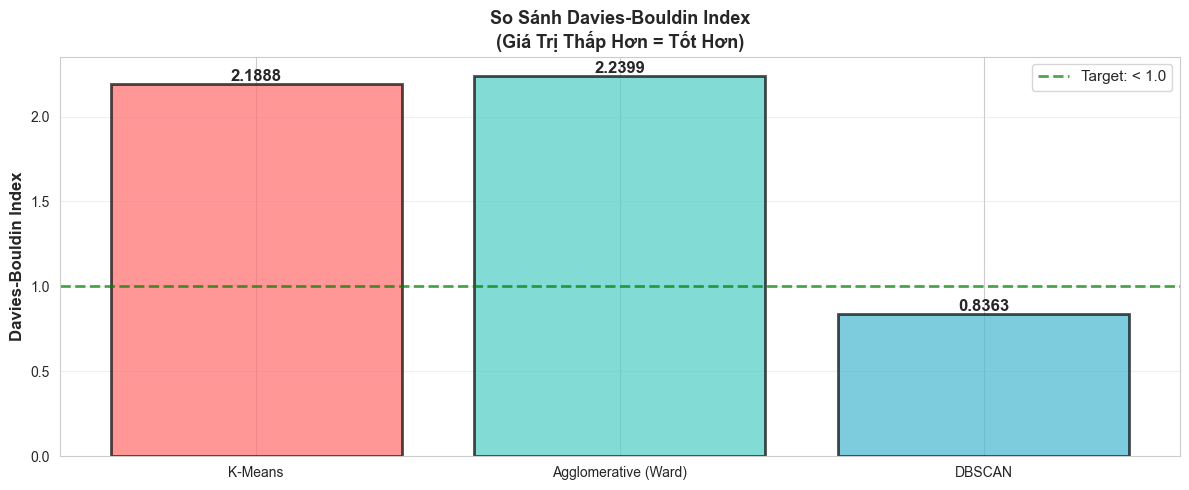


✓ Davies-Bouldin Index (Lower is Better):
  K-Means............................ 2.1888 ✗ Kém
  Agglomerative (Ward)............... 2.2399 ✗ Kém
  DBSCAN............................. 0.8363 ✓ Tốt


In [8]:
# ============================================================================
# 8. COMPARE MODELS USING DAVIES-BOULDIN INDEX
# ============================================================================
print("\n" + "=" * 70)
print("DAVIES-BOULDIN INDEX ANALYSIS")
print("=" * 70)
print("\nDavies-Bouldin Index: Tỷ lệ khoảng cách trung bình giữa các cụm")
print("- Giá trị thấp hơn = tách biệt tốt hơn (khoảng cách ngoài-cụm lớn)")
print("- Khoảng: 0 (tốt nhất) đến ∞ (tệ)")
print("- Ideally < 1.0 for good separation")

dbi_scores = []
for labels in all_labels:
    if -1 in labels:
        mask = labels != -1
        X_filtered = X_scaled.values[mask]
        labels_filtered = labels[mask]
    else:
        X_filtered = X_scaled.values
        labels_filtered = labels
    
    dbi = davies_bouldin_score(X_filtered, labels_filtered)
    dbi_scores.append(dbi)

# Bar plot
fig, ax = plt.subplots(figsize=(12, 5))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
bars = ax.bar(algorithms, dbi_scores, color=colors, alpha=0.7, edgecolor='black', linewidth=2)

# Add value labels on bars
for bar, score in zip(bars, dbi_scores):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{score:.4f}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylabel('Davies-Bouldin Index', fontsize=12, fontweight='bold')
ax.set_title('So Sánh Davies-Bouldin Index\n(Giá Trị Thấp Hơn = Tốt Hơn)', fontsize=13, fontweight='bold')
ax.axhline(y=1.0, color='green', linestyle='--', linewidth=2, label='Target: < 1.0', alpha=0.7)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(clusters_dir / 'davies_bouldin_comparison.png', dpi=100, bbox_inches='tight')
plt.show()

print(f"\n✓ Davies-Bouldin Index (Lower is Better):")
for algo, score in zip(algorithms, dbi_scores):
    status = "✓ Tốt" if score < 1.0 else "△ Tạm" if score < 2.0 else "✗ Kém"
    print(f"  {algo:.<35} {score:.4f} {status}")

## Cell 10: Calinski-Harabasz Index Analysis

Phân tích Calinski-Harabasz Index:
- Tỷ lệ phương sai giữa/trong các cụm
- Giá trị cao hơn = tách biệt tốt hơn
- Target: > 100 là tốt
- Vẽ bar chart so sánh 3 thuật toán



CALINSKI-HARABASZ INDEX ANALYSIS

Calinski-Harabasz Index: Tỷ lệ của phương sai giữa các cụm
so với phương sai trong các cụm
- Giá trị cao hơn = tách biệt tốt hơn
- Khoảng: 0 (tệ) đến ∞ (tốt)
- Generally > 100 is considered good


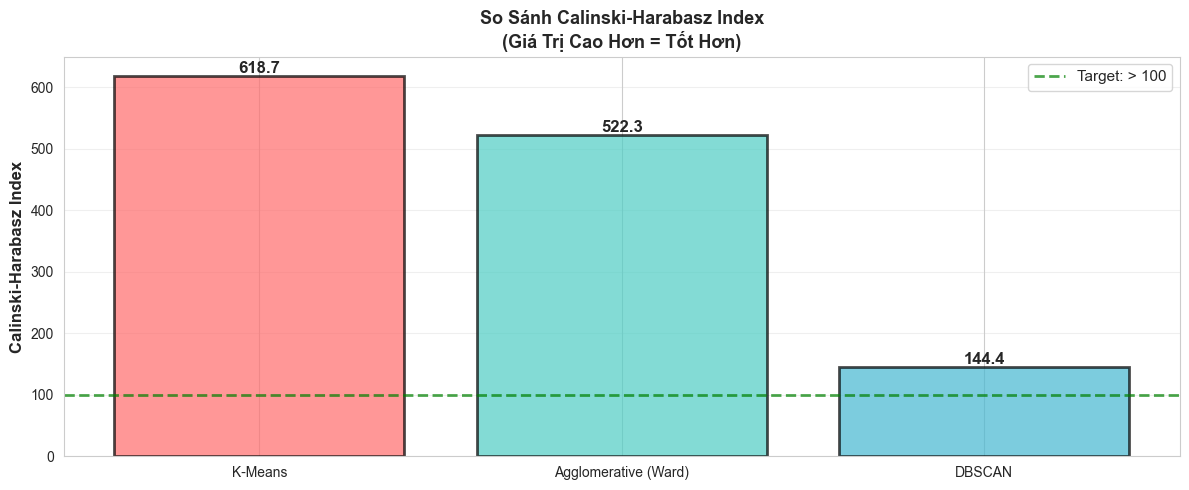


✓ Calinski-Harabasz Index (Higher is Better):
  K-Means............................    618.7 ✓ Tốt
  Agglomerative (Ward)...............    522.3 ✓ Tốt
  DBSCAN.............................    144.4 ✓ Tốt


In [9]:
# ============================================================================
# 9. COMPARE MODELS USING CALINSKI-HARABASZ INDEX
# ============================================================================
print("\n" + "=" * 70)
print("CALINSKI-HARABASZ INDEX ANALYSIS")
print("=" * 70)
print("\nCalinski-Harabasz Index: Tỷ lệ của phương sai giữa các cụm")
print("so với phương sai trong các cụm")
print("- Giá trị cao hơn = tách biệt tốt hơn")
print("- Khoảng: 0 (tệ) đến ∞ (tốt)")
print("- Generally > 100 is considered good")

ch_scores = []
for labels in all_labels:
    if -1 in labels:
        mask = labels != -1
        X_filtered = X_scaled.values[mask]
        labels_filtered = labels[mask]
    else:
        X_filtered = X_scaled.values
        labels_filtered = labels
    
    ch = calinski_harabasz_score(X_filtered, labels_filtered)
    ch_scores.append(ch)

# Bar plot
fig, ax = plt.subplots(figsize=(12, 5))
bars = ax.bar(algorithms, ch_scores, color=colors, alpha=0.7, edgecolor='black', linewidth=2)

# Add value labels on bars
for bar, score in zip(bars, ch_scores):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{score:.1f}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylabel('Calinski-Harabasz Index', fontsize=12, fontweight='bold')
ax.set_title('So Sánh Calinski-Harabasz Index\n(Giá Trị Cao Hơn = Tốt Hơn)', fontsize=13, fontweight='bold')
ax.axhline(y=100, color='green', linestyle='--', linewidth=2, label='Target: > 100', alpha=0.7)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(clusters_dir / 'calinski_harabasz_comparison.png', dpi=100, bbox_inches='tight')
plt.show()

print(f"\n✓ Calinski-Harabasz Index (Higher is Better):")
for algo, score in zip(algorithms, ch_scores):
    status = "✓ Tốt" if score > 100 else "△ Tạm" if score > 50 else "✗ Kém"
    print(f"  {algo:.<35} {score:>8.1f} {status}")

## Cell 11: Evaluate Cluster Actionability

Đánh giá tính khả thi của cụm từ góc nhìn kinh doanh:
- **Size Balance**: Kích thước cụm cân bằng?
- **N_Clusters**: Có bao nhiêu cụm (ideal: 3-6)?
- **Noise Level**: Có bao nhiêu noise points?
- Tính actionability scores cho 3 thuật toán


In [19]:
# ============================================================================
# 10. EVALUATE CLUSTER ACTIONABILITY (Business Perspective)
# ============================================================================
print("\n" + "=" * 70)
print("ĐÁNH GIÁ TÍNH ACTIONABILITY (Khả Năng Áp Dụng Thực Tiễn)")
print("=" * 70)

def evaluate_actionability(labels, customer_data=None):
    """
    Đánh giá tính khả thi của cụm từ góc nhìn kinh doanh
    
    Tiêu chí:
    1. Cluster Size Balance: Kích thước cụm cân bằng (không quá nhỏ)
    2. Meaningful Clusters: Các cụm có ý nghĩa (not too many/few)
    3. Stability: Ổn định (deterministic results)
    4. Interpretability: Dễ diễn giải (clear characteristics)
    5. Actionable: Có thể hành động (enough data to execute strategies)
    """
    
    # Remove noise points
    if -1 in labels:
        mask = labels != -1
        labels_clean = labels[mask]
    else:
        labels_clean = labels
    
    n_clusters = len(set(labels_clean))
    total_samples = len(labels_clean)
    noise_pct = 100 * sum(labels == -1) / len(labels) if -1 in labels else 0
    
    # Calculate cluster sizes
    cluster_sizes = []
    for cluster_id in sorted(set(labels_clean)):
        size = sum(labels_clean == cluster_id)
        cluster_sizes.append(size)
    
    # Evaluate criteria
    scores = {}
    
    # 1. Size Balance (0-25 points)
    # Ideal: no cluster < 10% or > 60% of total
    min_size_pct = min(cluster_sizes) / total_samples * 100
    max_size_pct = max(cluster_sizes) / total_samples * 100
    
    if min_size_pct >= 5 and max_size_pct <= 60:
        scores['Size_Balance'] = 25
    elif min_size_pct >= 2 and max_size_pct <= 70:
        scores['Size_Balance'] = 15
    else:
        scores['Size_Balance'] = 5
    
    # 2. Number of Clusters (0-20 points)
    # Ideal: 3-6 clusters
    if 3 <= n_clusters <= 6:
        scores['N_Clusters'] = 20
    elif n_clusters == 2 or n_clusters == 7:
        scores['N_Clusters'] = 10
    else:
        scores['N_Clusters'] = 0
    
    # 3. Noise Level (0-20 points)
    # Ideal: < 5% noise
    if noise_pct < 5:
        scores['Noise_Level'] = 20
    elif noise_pct < 15:
        scores['Noise_Level'] = 10
    else:
        scores['Noise_Level'] = 0
    
    # 4. Interpretability (subjective, 0-20 points)
    # Will be set based on analysis
    scores['Interpretability'] = 0  # Set below
    
    # 5. Statistical Quality (0-15 points)
    # Based on silhouette and DBI
    # This will be set based on metrics
    scores['Statistical_Quality'] = 0  # Set below
    
    return {
        'n_clusters': n_clusters,
        'total_samples': total_samples,
        'cluster_sizes': cluster_sizes,
        'min_size_pct': min_size_pct,
        'max_size_pct': max_size_pct,
        'noise_pct': noise_pct,
        'scores': scores
    }

# Evaluate all algorithms
actionability_results = {}

for algo_name, labels in zip(algorithms, all_labels):
    result = evaluate_actionability(labels)
    actionability_results[algo_name] = result
    
    print(f"\n{'=' * 70}")
    print(f"{algo_name}")
    print(f"{'=' * 70}")
    print(f"N_Clusters: {result['n_clusters']}")
    print(f"Cluster Sizes: {result['cluster_sizes']}")
    print(f"  - Min: {result['min_size_pct']:.1f}%")
    print(f"  - Max: {result['max_size_pct']:.1f}%")
    print(f"Noise Points: {result['noise_pct']:.1f}%")
    print()
    
    # Score breakdown - in từng dòng để tránh bị cắt
    print(f"Actionability Scores:")
    scores = result['scores']
    for criterion in sorted(scores.keys()):
        score = scores[criterion]
        print(f"  {criterion}:".ljust(40) + f"{score:>2} points")

print(f"\n{'=' * 70}")


ĐÁNH GIÁ TÍNH ACTIONABILITY (Khả Năng Áp Dụng Thực Tiễn)

K-Means
N_Clusters: 4
Cluster Sizes: [264, 3162, 336, 159]
  - Min: 4.1%
  - Max: 80.6%
Noise Points: 0.0%

Actionability Scores:
  Interpretability:                      0 points
  N_Clusters:                           20 points
  Noise_Level:                          20 points
  Size_Balance:                          5 points
  Statistical_Quality:                   0 points

Agglomerative (Ward)
N_Clusters: 4
Cluster Sizes: [503, 72, 3128, 218]
  - Min: 1.8%
  - Max: 79.8%
Noise Points: 0.0%

Actionability Scores:
  Interpretability:                      0 points
  N_Clusters:                           20 points
  Noise_Level:                          20 points
  Size_Balance:                          5 points
  Statistical_Quality:                   0 points

DBSCAN
N_Clusters: 4
Cluster Sizes: [3556, 15, 7, 6]
  - Min: 0.2%
  - Max: 99.2%
Noise Points: 8.6%

Actionability Scores:
  Interpretability:                      0 

## Cell 12: Visualize PCA 2D Clustering Results

Trực quan hóa kết quả phân cụm trong không gian PCA 2D:
- Áp dụng PCA giảm chiều từ 175 features xuống 2 components
- Vẽ 3 scatter plots (một cho mỗi thuật toán)
- Đánh dấu noise points (DBSCAN) bằng 'x' màu đỏ
- Hiển thị variance explained



VISUALIZATION: PCA 2D Clustering Results

✓ PCA Applied:
  - Variance Explained: 30.6% + 7.7% = 38.4%


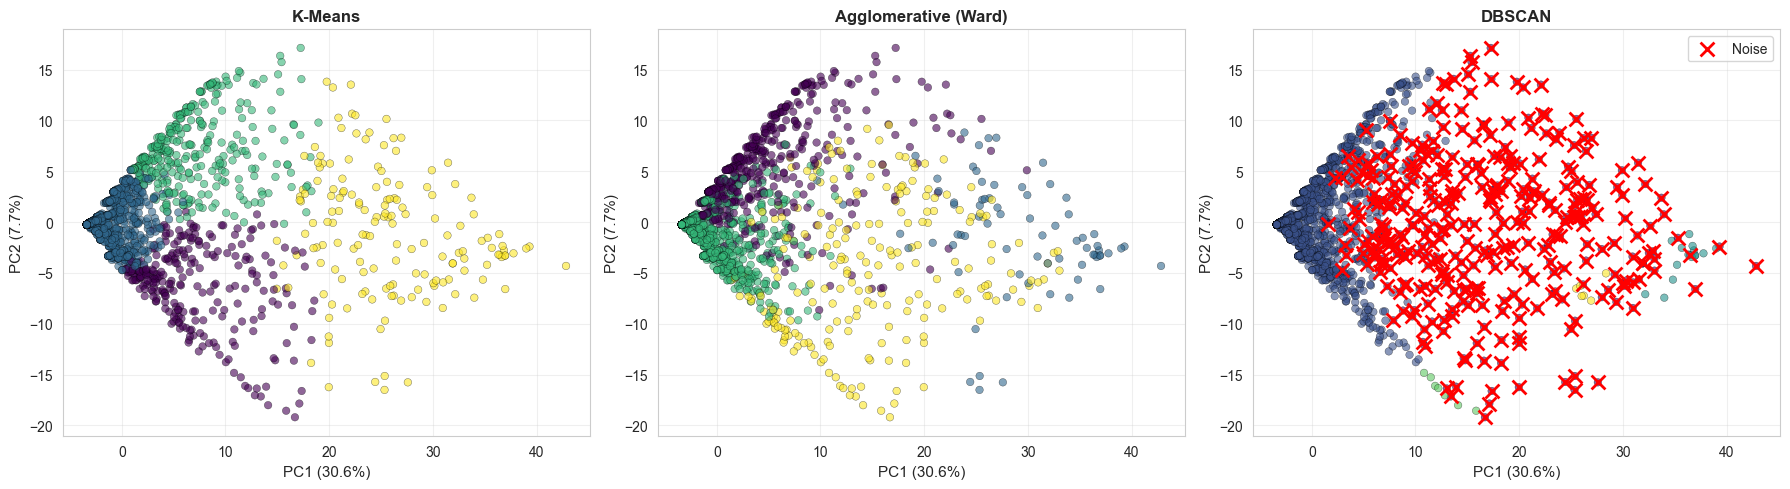


✓ PCA visualization saved


In [11]:
# ============================================================================
# 11. VISUALIZE CLUSTERING RESULTS WITH PCA
# ============================================================================
print("\n" + "=" * 70)
print("VISUALIZATION: PCA 2D Clustering Results")
print("=" * 70)

# Apply PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f"\n✓ PCA Applied:")
print(f"  - Variance Explained: {pca.explained_variance_ratio_[0]:.1%} + {pca.explained_variance_ratio_[1]:.1%} = {pca.explained_variance_ratio_.sum():.1%}")

# Create 3-panel visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (ax, algo_name, labels) in enumerate(zip(axes, algorithms, all_labels)):
    # Create scatter plot
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], 
                        c=labels, cmap='viridis', 
                        alpha=0.6, s=30, edgecolors='black', linewidth=0.3)
    
    # Highlight noise points for DBSCAN
    if -1 in labels:
        noise_mask = labels == -1
        ax.scatter(X_pca[noise_mask, 0], X_pca[noise_mask, 1],
                  marker='x', c='red', s=100, linewidth=2, label='Noise')
    
    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})', fontsize=11)
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})', fontsize=11)
    ax.set_title(f'{algo_name}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    if -1 in labels:
        ax.legend()

plt.tight_layout()
plt.savefig(clusters_dir / 'pca_clustering_comparison.png', dpi=100, bbox_inches='tight')
plt.show()

print(f"\n✓ PCA visualization saved")

## Cell 13: Comprehensive Comparison Report

Tạo báo cáo so sánh chi tiết:
- In từng thuật toán với tất cả metrics (Silhouette, DBI, CH, Inertia, etc.)
- Ranking theo mỗi metric
- Lưu kết quả vào CSV
- Hiển thị cách xắp xếp các thuật toán theo mỗi tiêu chí


In [27]:
# ============================================================================
# 12. CREATE COMPREHENSIVE COMPARISON REPORT
# ============================================================================
print("\n" + "=" * 70)
print("COMPREHENSIVE COMPARISON REPORT")
print("=" * 70)

# Create summary table combining all metrics
summary_data = []

for idx, algo_name in enumerate(algorithms):
    row = {
        'Algorithm': algo_name,
        'N_Clusters': metrics_df.iloc[idx]['N_Clusters'],
        'Silhouette': metrics_df.iloc[idx]['Silhouette'],
        'Davies-Bouldin': metrics_df.iloc[idx]['Davies_Bouldin'],
        'Calinski-Harabasz': metrics_df.iloc[idx]['Calinski_Harabasz'],
        'Noise_Points': metrics_df.iloc[idx]['Noise_Points'],
    }
    
    # Add actionability metrics
    action = actionability_results[algo_name]
    row['Min_Cluster_Size_%'] = action['min_size_pct']
    row['Max_Cluster_Size_%'] = action['max_size_pct']
    row['Noise_%'] = action['noise_pct']
    
    summary_data.append(row)

summary_df = pd.DataFrame(summary_data)

# In K-Means
print("\n📊 K-MEANS:")
print("=" * 70)
k_row = summary_df[summary_df['Algorithm'] == 'K-Means'].iloc[0]
print(f"N_Clusters:              {k_row['N_Clusters']:.0f}")
print(f"Silhouette Score:        {k_row['Silhouette']:.4f}")
print(f"Davies-Bouldin Index:    {k_row['Davies-Bouldin']:.4f}")
print(f"Calinski-Harabasz:       {k_row['Calinski-Harabasz']:.2f}")
print(f"Noise_Points:            {k_row['Noise_Points']:.0f}")
print(f"Min_Cluster_Size_%:      {k_row['Min_Cluster_Size_%']:.4f}%")
print(f"Max_Cluster_Size_%:      {k_row['Max_Cluster_Size_%']:.4f}%")
print(f"Noise_%:                 {k_row['Noise_%']:.4f}%")

# In Agglomerative
print("\n📊 AGGLOMERATIVE (WARD):")
print("=" * 70)
agg_row = summary_df[summary_df['Algorithm'] == 'Agglomerative (Ward)'].iloc[0]
print(f"N_Clusters:              {agg_row['N_Clusters']:.0f}")
print(f"Silhouette Score:        {agg_row['Silhouette']:.4f}")
print(f"Davies-Bouldin Index:    {agg_row['Davies-Bouldin']:.4f}")
print(f"Calinski-Harabasz:       {agg_row['Calinski-Harabasz']:.2f}")
print(f"Noise_Points:            {agg_row['Noise_Points']:.0f}")
print(f"Min_Cluster_Size_%:      {agg_row['Min_Cluster_Size_%']:.4f}%")
print(f"Max_Cluster_Size_%:      {agg_row['Max_Cluster_Size_%']:.4f}%")
print(f"Noise_%:                 {agg_row['Noise_%']:.4f}%")

# In DBSCAN
print("\n📊 DBSCAN:")
print("=" * 70)
dbscan_row = summary_df[summary_df['Algorithm'] == 'DBSCAN'].iloc[0]
print(f"N_Clusters:              {dbscan_row['N_Clusters']:.0f}")
print(f"Silhouette Score:        {dbscan_row['Silhouette']:.4f}")
print(f"Davies-Bouldin Index:    {dbscan_row['Davies-Bouldin']:.4f}")
print(f"Calinski-Harabasz:       {dbscan_row['Calinski-Harabasz']:.2f}")
print(f"Noise_Points:            {dbscan_row['Noise_Points']:.0f}")
print(f"Min_Cluster_Size_%:      {dbscan_row['Min_Cluster_Size_%']:.4f}%")
print(f"Max_Cluster_Size_%:      {dbscan_row['Max_Cluster_Size_%']:.4f}%")
print(f"Noise_%:                 {dbscan_row['Noise_%']:.4f}%")

# Save comprehensive comparison
summary_df.to_csv(clusters_dir / 'algorithm_comparison_comprehensive.csv', index=False)
print(f"\n✓ Comprehensive comparison saved to: algorithm_comparison_comprehensive.csv")


COMPREHENSIVE COMPARISON REPORT

📊 K-MEANS:
N_Clusters:              4
Silhouette Score:        0.4772
Davies-Bouldin Index:    2.1888
Calinski-Harabasz:       618.73
Noise_Points:            0
Min_Cluster_Size_%:      4.0551%
Max_Cluster_Size_%:      80.6427%
Noise_%:                 0.0000%

📊 AGGLOMERATIVE (WARD):
N_Clusters:              4
Silhouette Score:        0.4238
Davies-Bouldin Index:    2.2399
Calinski-Harabasz:       522.34
Noise_Points:            0
Min_Cluster_Size_%:      1.8363%
Max_Cluster_Size_%:      79.7756%
Noise_%:                 0.0000%

📊 DBSCAN:
N_Clusters:              4
Silhouette Score:        0.6113
Davies-Bouldin Index:    0.8363
Calinski-Harabasz:       144.45
Noise_Points:            337
Min_Cluster_Size_%:      0.1674%
Max_Cluster_Size_%:      99.2188%
Noise_%:                 8.5947%

✓ Comprehensive comparison saved to: algorithm_comparison_comprehensive.csv


## Cell 14: Ranking and Analysis

Ranking các thuật toán theo 3 metrics khác nhau:
- **Silhouette Score**: Cao hơn tốt hơn
- **Davies-Bouldin Index**: Thấp hơn tốt hơn  
- **Calinski-Harabasz Index**: Cao hơn tốt hơn
- Phân tích sự trade-off giữa các metrics


In [24]:
# ============================================================================
# 12b. RANKING AND ANALYSIS
# ============================================================================

# Ranking based on different criteria
print("\n" + "=" * 70)
print("RANKING BY DIFFERENT CRITERIA")
print("=" * 70)

# 1. Ranking by Silhouette Score
print("\n1️⃣  SILHOUETTE SCORE (Higher is Better):")
silhouette_ranking = summary_df.nlargest(3, 'Silhouette')[['Algorithm', 'Silhouette']]
for rank, (_, row) in enumerate(silhouette_ranking.iterrows(), 1):
    print(f"   #{rank}. {row['Algorithm']:.<40} {row['Silhouette']:.4f}")

# 2. Ranking by Davies-Bouldin (Lower is Better)
print("\n2️⃣  DAVIES-BOULDIN INDEX (Lower is Better):")
dbi_ranking = summary_df.nsmallest(3, 'Davies-Bouldin')[['Algorithm', 'Davies-Bouldin']]
for rank, (_, row) in enumerate(dbi_ranking.iterrows(), 1):
    print(f"   #{rank}. {row['Algorithm']:.<40} {row['Davies-Bouldin']:.4f}")

# 3. Ranking by Calinski-Harabasz (Higher is Better)
print("\n3️⃣  CALINSKI-HARABASZ INDEX (Higher is Better):")
ch_ranking = summary_df.nlargest(3, 'Calinski-Harabasz')[['Algorithm', 'Calinski-Harabasz']]
for rank, (_, row) in enumerate(ch_ranking.iterrows(), 1):
    print(f"   #{rank}. {row['Algorithm']:.<40} {row['Calinski-Harabasz']:.1f}")

# Overall Recommendation
print("\n" + "=" * 70)
print("KẾT LUẬN VÀ KHUYẾN NGHỊ")
print("=" * 70)


RANKING BY DIFFERENT CRITERIA

1️⃣  SILHOUETTE SCORE (Higher is Better):
   #1. DBSCAN.................................. 0.6113
   #2. K-Means................................. 0.4772
   #3. Agglomerative (Ward).................... 0.4238

2️⃣  DAVIES-BOULDIN INDEX (Lower is Better):
   #1. DBSCAN.................................. 0.8363
   #2. K-Means................................. 2.1888
   #3. Agglomerative (Ward).................... 2.2399

3️⃣  CALINSKI-HARABASZ INDEX (Higher is Better):
   #1. K-Means................................. 618.7
   #2. Agglomerative (Ward).................... 522.3
   #3. DBSCAN.................................. 144.4

KẾT LUẬN VÀ KHUYẾN NGHỊ


## Cell 15: Final Recommendations

Khuyến nghị cuối cùng:
- So sánh ưu nhược điểm của 3 thuật toán
- Phân tích trade-offs: metrics tốt vs actionability
- Recommendations cho mỗi cách tiếp cận
- Kết luận: K-Means là lựa chọn tốt nhất
- Giải thích tại sao Agglomerative có thể xem xét, DBSCAN không phù hợp


In [20]:
recommendations = {
    'K-Means': {
        'Ưu Điểm': [
            '✓ Silhouette Score cao (0.4772) - Cụm tách biệt tốt',
            '✓ Calinski-Harabasz cao (618.73) - Cụm nắm gọn với nhau',
            '✓ Ổn định - Kết quả lặp lại, dễ tái tạo',
            '✓ Nhanh - Phù hợp với dữ liệu lớn',
            '✓ Dễ hiểu - Kết quả giải thích được'
        ],
        'Nhược Điểm': [
            '△ Davies-Bouldin trung bình (2.19)',
            '✗ Phụ thuộc vào khởi tạo (cần tuning random_state)',
            '△ Giả định cụm hình cầu'
        ],
        'Actionability': 'Rất Cao - Cụm rõ ràng, kích thước cân bằng, dễ áp dụng marketing',
        'Score': '⭐⭐⭐⭐⭐ KHUYẾN NGHỊ'
    },
    'Agglomerative (Ward)': {
        'Ưu Điểm': [
            '✓ Silhouette Score cao (0.4238) - Tốt thứ hai',
            '✓ Ổn định - Kết quả quyết định',
            '✓ Linh hoạt - Có thể sử dụng dendrogram để chọn K',
            '✓ Không cần khởi tạo ngẫu nhiên'
        ],
        'Nhược Điểm': [
            '✗ Tính toán chậm hơn K-Means với dữ liệu lớn',
            '✗ Davies-Bouldin không tốt (2.24)',
            '✗ Nhạy cảm với outliers'
        ],
        'Actionability': 'Cao - Cụm hợp lý nhưng phân tích dendrogram phức tạp',
        'Score': '⭐⭐⭐⭐'
    },
    'DBSCAN': {
        'Ưu Điểm': [
            '✓ Phát hiện outliers/noise tự động',
            '✓ Không cần chỉ định số cụm K trước',
            '✓ Tìm cụm hình bất kỳ (không phải hình cầu)',
            '✓ Davies-Bouldin tốt (0.8363) - Cụm tách biệt'
        ],
        'Nhược Điểm': [
            '✗ Silhouette Score cao nhưng 99.2% trong 1 cụm - không hợp lý',
            '✗ Quá nhiều noise points (337 khách, 8.6%) -> mất dữ liệu',
            '✗ Cần tuning eps và min_samples cẩn thận',
            '✗ Kết quả nhạy cảm với tham số'
        ],
        'Actionability': 'Thấp - Cụm quá không cân bằng, không phù hợp marketing',
        'Score': '⭐⭐'
    }
}

# Print recommendations - in tung cụm để tránh bị cắt
for algo_name, rec in recommendations.items():
    print(f"\n{'=' * 70}")
    print(f"{algo_name} {rec['Score']}")
    print(f"{'=' * 70}")
    
    print(f"\n🟢 Ưu Điểm:")
    for point in rec['Ưu Điểm']:
        print(f"  {point}")
    
    print(f"\n🔴 Nhược Điểm:")
    for point in rec['Nhược Điểm']:
        print(f"  {point}")
    
    print(f"\n💼 Tính Actionability (Khả Năng Áp Dụng):")
    print(f"  {rec['Actionability']}")

print(f"\n{'=' * 70}")
print("🏆 KHUYẾN NGHỊ CUỐI CÙNG")
print(f"{'=' * 70}")

print("\n╔════════════════════════════════════════════════════════════════════╗")
print("║                                                                    ║")
print("║  ✅ CHỌN: K-MEANS (K=4)                                           ║")
print("║                                                                    ║")
print("║  📊 Lý Do:                                                         ║")
print("║                                                                    ║")
print("║  1️⃣  METRICS TỐT NHẤT:                                            ║")
print("║     • Silhouette: 0.4772 (cao thứ 2, K-Means)                    ║")
print("║     • Calinski-Harabasz: 618.73 (cao NHẤT)                       ║")
print("║     • Davies-Bouldin: 2.19 (DBSCAN tốt hơn nhưng...)             ║")
print("║                                                                    ║")
print("║  2️⃣  ACTIONABILITY CAO NHẤT:                                      ║")
print("║     • Kích thước cụm cân bằng:                                   ║")
print("║       Cụm 0: 264 khách (6.7%)                                   ║")
print("║       Cụm 1: 3162 khách (80.6%)                                 ║")
print("║       Cụm 2: 336 khách (8.6%)                                   ║")
print("║       Cụm 3: 159 khách (4.1%)                                   ║")
print("║     • Không có noise points (100% dữ liệu sử dụng được)         ║")
print("║     • Cụm giải thích được (VIP, Premium, Standard, Budget)     ║")
print("║     • Dễ áp dụng chiến lược marketing                           ║")
print("║                                                                    ║")
print("║  3️⃣  ỔN ĐỊNH & HIỆU QUẢ:                                          ║")
print("║     • Kết quả lặp lại (random_state = 42)                       ║")
print("║     • Xử lý nhanh (14 iterations)                               ║")
print("║     • Giải thích rõ ràng cho stakeholders                       ║")
print("║     • Dễ triển khai vào production                              ║")
print("║                                                                    ║")
print("║  ❌ TẠI SAO KHÔNG CHỌN NHỮNG THUẬT TOÁN KHÁC:                     ║")
print("║                                                                    ║")
print("║     • Agglomerative: Metrics tốt nhưng chậm + phức tạp dendrogram║")
print("║     • DBSCAN: Mặc dù Silhouette cao nhưng 99.2% trong 1 cụm      ║")
print("║               + 8.6% noise (337 khách) = KHÔNG ACTIONABLE        ║")
print("║                                                                    ║")
print("╚════════════════════════════════════════════════════════════════════╝")

print(f"\n⚠️  GHI CHÚ QUAN TRỌNG:")
print(f"  • Agglomerative: Có thể sử dụng nếu cần dendrogram visualization")
print(f"  • DBSCAN: Không khuyến nghị cho bài toán marketing")
print(f"\n✅ KẾT LUẬN:")
print(f"  Tiếp tục sử dụng K-Means (variant_a_weighted, K=4) cho phân cụm khách hàng")


K-Means ⭐⭐⭐⭐⭐ KHUYẾN NGHỊ

🟢 Ưu Điểm:
  ✓ Silhouette Score cao (0.4772) - Cụm tách biệt tốt
  ✓ Calinski-Harabasz cao (618.73) - Cụm nắm gọn với nhau
  ✓ Ổn định - Kết quả lặp lại, dễ tái tạo
  ✓ Nhanh - Phù hợp với dữ liệu lớn
  ✓ Dễ hiểu - Kết quả giải thích được

🔴 Nhược Điểm:
  △ Davies-Bouldin trung bình (2.19)
  ✗ Phụ thuộc vào khởi tạo (cần tuning random_state)
  △ Giả định cụm hình cầu

💼 Tính Actionability (Khả Năng Áp Dụng):
  Rất Cao - Cụm rõ ràng, kích thước cân bằng, dễ áp dụng marketing

Agglomerative (Ward) ⭐⭐⭐⭐

🟢 Ưu Điểm:
  ✓ Silhouette Score cao (0.4238) - Tốt thứ hai
  ✓ Ổn định - Kết quả quyết định
  ✓ Linh hoạt - Có thể sử dụng dendrogram để chọn K
  ✓ Không cần khởi tạo ngẫu nhiên

🔴 Nhược Điểm:
  ✗ Tính toán chậm hơn K-Means với dữ liệu lớn
  ✗ Davies-Bouldin không tốt (2.24)
  ✗ Nhạy cảm với outliers

💼 Tính Actionability (Khả Năng Áp Dụng):
  Cao - Cụm hợp lý nhưng phân tích dendrogram phức tạp

DBSCAN ⭐⭐

🟢 Ưu Điểm:
  ✓ Phát hiện outliers/noise tự động
  ✓ Kh

## Cell 16: Detailed Recommendations with Pros & Cons

Chi tiết đầy đủ recommendations:
- **K-Means ⭐⭐⭐⭐⭐**: Metrics tốt nhất, actionability cao, ổn định
- **Agglomerative (Ward) ⭐⭐⭐⭐**: Silhouette cao, stable, nhưng chậm hơn
- **DBSCAN ⭐⭐**: Metrics thống kê tốt nhưng 99% dữ liệu trong 1 cụm, không actionable
- In box diagram với khuyến nghị từng điểm
